# Lasso regressor

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import sklearn

In [2]:
dataset = fetch_california_housing()
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [3]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
X.shape, y.shape

((20640, 8), (20640,))

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [6]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train,y_train)
train_score_LR = LR.score(X_train,y_train)
print("The train score for LR model is {}".format(train_score_LR))

The train score for LR model is 0.6090156808313738


In [7]:
#Lasso regression model
print(".........................Lasso Model............................................")
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
print("The train score for lasso model is {}".format(train_score_ls))

.........................Lasso Model............................................
The train score for lasso model is 0.5488267992849574


In [8]:
#Ridge Regression Model
print("Ridge Model............................................")
ridgeReg = Ridge(alpha=0.1)
ridgeReg.fit(X_train,y_train)
train_score_ridge = ridgeReg.score(X_train, y_train)
print("The train score for ridge model is {}".format(train_score_ridge))

Ridge Model............................................
The train score for ridge model is 0.6090156804624769


In [9]:
#ElasticNet Regression Model
enet_model = ElasticNet(alpha = 0.1).fit(X_train, y_train)
train_enet_score = enet_model.score(X_train, y_train)

In [10]:
# Testing a model on testing data set
LR_test_score = LR.score(X_test,y_test)
lasso_test_score =lasso.score(X_test,y_test)
Ridge_test_score =ridgeReg.score(X_test,y_test)
enet_test_score = enet_model.score(X_test,y_test)

result = pd.DataFrame({'LR score':[train_score_LR,LR_test_score],
                     'Lasso score': [train_score_ls,lasso_test_score],
                     'Ridge score':[train_score_ridge,Ridge_test_score],
                     'Enet score':[train_enet_score,enet_test_score]}, 
                      index = ['Train score','Test score'])

In [11]:
print(result)

             LR score  Lasso score  Ridge score  Enet score
Train score  0.609016     0.548827     0.609016    0.579716
Test score   0.594579     0.523638     0.594578    0.557387


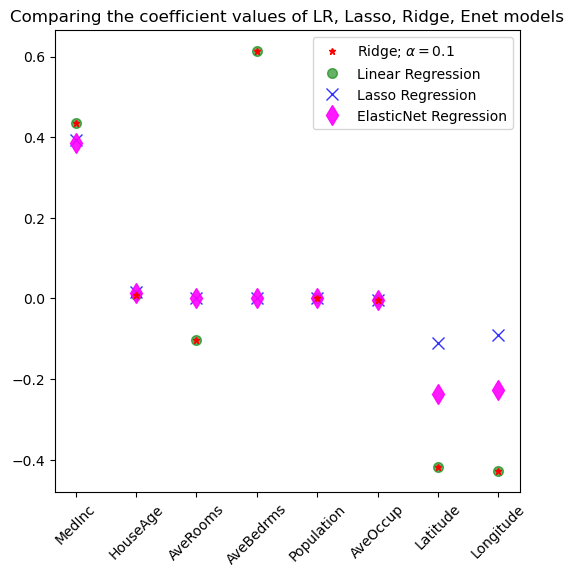

In [12]:
#Lets plot the coefficients for both the linear and ridge models.
plt.figure(figsize = (6,6))
plt.plot(dataset.feature_names,ridgeReg.coef_,alpha=1,linestyle='none',
         marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.1$',zorder=7)

plt.plot(dataset.feature_names,LR.coef_,alpha=0.6,linestyle='none',
         marker='o',markersize=7,color='green',label='Linear Regression')

plt.plot(dataset.feature_names,lasso.coef_,alpha=0.8,linestyle='none',
         marker='x',markersize=9,color='blue',label='Lasso Regression')

plt.plot(dataset.feature_names,enet_model.coef_,alpha=0.9,linestyle='none',
         marker='d',markersize=10,color='magenta',label='ElasticNet Regression')
plt.xticks(rotation = 45 )
plt.title('Comparing the coefficient values of LR, Lasso, Ridge, Enet models')
plt.legend()
plt.show()

# Using cross validation

In [13]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

We may need to try out different alpha values to find the optimal constraint value. For this case, we can use the cross-validation model in the sklearn package. This will try out different combinations of alpha values and then choose the best model.




 # Lasso Cross validation

In [14]:
#Using the linear CV model
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.0002,0.0009,0.001,0.002,0.003,0.0035,0.0003,0.01, 0.1, 1, 10],
                   random_state=10).fit(X_train, y_train)
#score
print(f'tarining score:{lasso_cv.score(X_train, y_train)}')
print(lasso_cv.alpha_)

tarining score:0.6088668691740277
0.002


# Ridge Cross validation

In [15]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV
#Ridge Cross validation
ridge_cv = RidgeCV(alphas = [0.0001,0.002, 0.001,0.01,0.02, 0.1, 1, 10,10.5,11,12,15,17,19,50,100,150],
                    ).fit(X_train, y_train)
#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print(ridge_cv.alpha_)

The train score for ridge model is 0.6087460107958624
100.0


In [16]:
#Using the ElasticNetCV CV model
from sklearn.linear_model import ElasticNetCV

#ElasticNetCV Cross validation
ElasticNet_cv = ElasticNetCV(alphas = [0.0001, 0.001,0.002,0.0025,0.003,0.035,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for elasticnetCV model is {}".format(ElasticNet_cv.score(X_train, y_train)))
ElasticNet_cv.alpha_

The train score for elasticnetCV model is 0.6088376784780601


0.003

In [17]:
np.log(4)

1.3862943611198906

In [24]:
# generating the random values for alpha
alpha = np.logspace(-4,-1,10)
np.empty_like(alpha)
print(alpha)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


In [25]:
# fitting a lasso regressor for evry alpha value
alphas = np.logspace(-4, -1, 10)
scores = np.empty_like(alphas)

for i,a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_train, y_train)    
print(scores)

[0.60901531 0.60901395 0.60900767 0.60897848 0.608843   0.60821409
 0.60529465 0.59836632 0.58788991 0.5488268 ]


0.03432308935225843


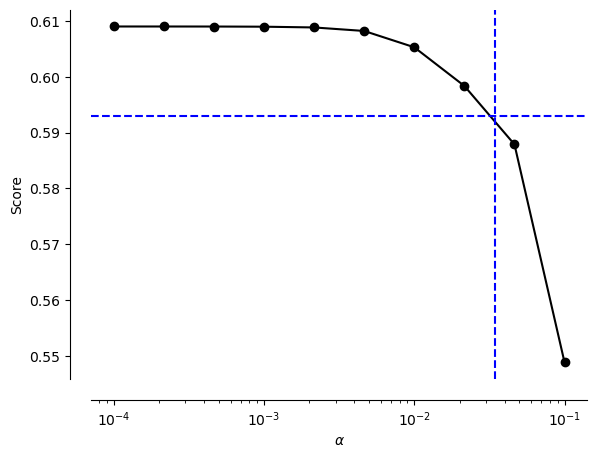

In [27]:
# comparing alpha values with scores.
lassocv = LassoCV(random_state=0)
lassocv.fit(X_train, y_train)
lassocv_score = lassocv.score(X_train, y_train)
lassocv_alpha = lassocv.alpha_
print(lassocv_alpha)
# print('CV', lassocv.coef_)
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

# Elastic net regressor

In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
enet_model = ElasticNet().fit(X_train, y_train)

In [31]:
print(enet_model.coef_)
print(enet_model.intercept_)      

[ 2.54634058e-01  1.17146545e-02  0.00000000e+00 -0.00000000e+00
  9.37880016e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
0.7324904731109174


In [32]:
y_pred = enet_model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test,y_pred))
mse

0.8858041619249865

NameError: name 'lr' is not defined

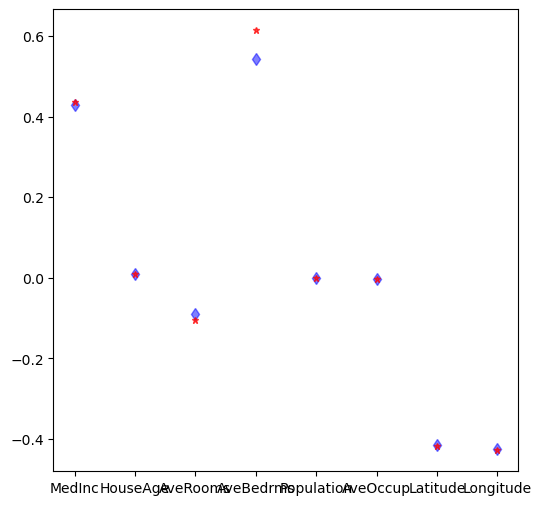

In [28]:
#plot size
plt.figure(figsize = (6,6))
#add plot for ridge regression
plt.plot(dataset.feature_names,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(dataset.feature_names,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()


# prediction on all models.

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
## prediction for lasso
y_pred = LR.predict(X_test)
print(f'testing using LR:{r2_score(y_test,y_pred)}')

y_pred_0 = lasso.predict(X_test)
print(f'testing using lasso:{r2_score(y_test,y_pred_0)}')

## prediction for Ridge
y_pred_2 = ridgeReg.predict(X_test)
print(f'testing using ridge:{r2_score(y_test,y_pred_2)}')

## prediction for Elastic
y_pred_1 = enet_model.predict(X_test)
print(f'testing using Elastic net:{r2_score(y_test,y_pred_1)}')

testing usinf LR:0.5945787000665598
testing usinf lasso:0.5236377548825866
testing usinf ridge:0.5945776339672635
testing usinf Eleatic net:0.4099079908643022


In [ ]:
'if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model’s inputs.'

# Model Tuning
The operations using the ElasticNetCV method to find the optimum alpha value.

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(model,X_train,y_train, return_estimator=True, n_jobs=2) 
print(cv_results)


{'fit_time': array([0.10937953, 0.11414194, 0.07252145, 0.07311344, 0.07881069]), 'score_time': array([0.00199986, 0.00200486, 0.00110126, 0.0018971 , 0.00189877]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-

In [32]:
score = cv_results["test_score"]
print(score)
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

[0.63949534 0.60571284 0.61115815 0.56191319 0.60883357]
R2 score: 0.605 ± 0.025


In [34]:
from sklearn.preprocessing import Normalizer
alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), ElasticNetCV(alphas=alphas))
cv_results = cross_validate(model,X_train,y_train, return_estimator=True, n_jobs=2) 
print(cv_results)

{'fit_time': array([0.17571187, 0.16764641, 0.14086819, 0.16501927, 0.14755058]), 'score_time': array([0.00104594, 0.00097847, 0.00100589, 0.0010004 , 0.00101781]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.373823

In [ ]:
from sklearn.linear_model import ElasticNetCV

enet_cv_model = ElasticNetCV(cv = 10).fit(X_train,y_train)

# If we don't give the lambdas, what's the alpha?

enet_cv_model.alpha_

Accordingly, we find the alpha value as 0.06772.

Afterward, we can find the constant of the model established with ElasticNetCV as follows.

In [ ]:
enet_cv_model.intercept_

In [ ]:
enet_cv_model.coef_

In [ ]:
# Let's create the final model according to optimum alpha.

enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

# Let's now calculate the error for the test set using this final model.

y_pred_1 = enet_tuned.predict(X_test)
r2_score(y_test,y_pred_1)
# np.sqrt(mean_squared_error(y_test,y_pred_1))

In [ ]:

from sklearn.metrics import r2_score
## prediction for lasso
y_pred_0 = lasso.predict(X_test)
print(r2_score(y_test,y_pred_0))

## prediction for Ridge
y_pred_2 = ridgeReg.predict(X_test)
print(r2_score(y_test,y_pred_2))

## prediction for Elastic
y_pred_1 = enet_model.predict(X_test)
print(r2_score(y_test,y_pred_1))

## prediction for lr
y_pred_3 = lr.predict(X_test)
print(r2_score(y_test,y_pred_3))

In [ ]:
!pip install ucimlrepo

In [37]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

In [40]:
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
print(y)  

      quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]


In [42]:
# metadata 
print(wine_quality.metadata) 
# variable information 
print(wine_quality.variables)

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

In [53]:
from ucimlrepo import fetch_ucirepo
# fetch dataset 
iris = fetch_ucirepo(id=53) 
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
# metadata 
print(iris.metadata) 
# variable information 
# print(X)
# print(y)


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 


In [ ]:
X = X.fillna(method='bfill')
# X.isnull().sum()

In [ ]:
X.info()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import sklearn.cross_decomposition as cv
import sklearn

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# # metadata 
# print(automobile.metadata) 
  
# # variable information 
# print(automobile.variables) 

In [ ]:
print(X['engine-location'].value_counts()  )     
print(X['drive-wheels'].value_counts() )         
print(X['body-style'].value_counts())

In [4]:
# choosing a particular dtype
X.select_dtypes('object').nunique()

fuel-system         8
engine-type         7
engine-location     2
drive-wheels        3
body-style          5
aspiration          2
fuel-type           2
make               22
dtype: int64

In [7]:
X['fuel-system'].value_counts()

fuel-system
5    94
1    66
3    20
0    11
6     9
2     3
4     1
7     1
Name: count, dtype: int64

In [6]:
# converting catgorical to numerical data.
X['fuel-system']=X['fuel-system'].astype('category').cat.codes

C:\Users\excel\AppData\Local\Temp\ipykernel_49036\1461418535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['fuel-system']=X['fuel-system'].astype('category').cat.codes


In [8]:
# X['fuel-system']=X['fuel-system'].astype('category').cat.codes
X['engine-type']=X['engine-type'].astype('category').cat.codes
X['engine-location']=X['engine-location'].astype('category').cat.codes
X['drive-wheels']=X['drive-wheels'].astype('category').cat.codes
X['aspiration']=X['aspiration'].astype('category').cat.codes
X['fuel-type']=X['fuel-type'].astype('category').cat.codes
X['make']=X['make'].astype('category').cat.codes
X['body-style'] = X['body-style'].astype('category').cat.codes

C:\Users\excel\AppData\Local\Temp\ipykernel_49036\3005234168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['engine-type']=X['engine-type'].astype('category').cat.codes
C:\Users\excel\AppData\Local\Temp\ipykernel_49036\3005234168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['engine-location']=X['engine-location'].astype('category').cat.codes
C:\Users\excel\AppData\Local\Temp\ipykernel_49036\3005234168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [10]:
X.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system             int8
engine-size            int64
num-of-cylinders       int64
engine-type             int8
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location         int8
drive-wheels            int8
body-style              int8
num-of-doors         float64
aspiration              int8
fuel-type               int8
make                    int8
normalized-losses    float64
dtype: object

In [ ]:
# filling a missing values
price                 4
peak-rpm              2
horsepower            2
stroke                4
bore                  4
num-of-doors          2
normalized-losses    41

In [ ]:
X[['price','peak-rpm','horsepower','stroke','bore','num-of-doors','normalized-losses']].describe()

In [9]:
#filling the missing value
X['price'] = X['price'].fillna(X['price'].median())
X['normalized-losses'] = X['normalized-losses'].fillna(X['normalized-losses'].median())
X['num-of-doors'] = X['num-of-doors'].fillna(X['num-of-doors'].mode()[0])
X['peak-rpm'] = X['peak-rpm'].fillna(X['peak-rpm'].mean())
X['horsepower'] = X['horsepower'].fillna(X['horsepower'].mean())
X['stroke'] = X['stroke'].fillna(X['stroke'].mean())
X['bore'] = X['bore'].fillna(X['bore'].mean())

C:\Users\excel\AppData\Local\Temp\ipykernel_26216\3505210054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['price'] = X['price'].fillna(X['price'].median())
C:\Users\excel\AppData\Local\Temp\ipykernel_26216\3505210054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['normalized-losses'] = X['normalized-losses'].fillna(X['normalized-losses'].median())
C:\Users\excel\AppData\Local\Temp\ipykernel_26216\3505210054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [ ]:
X.isnull().sum()

In [ ]:
X[['price','peak-rpm','horsepower','stroke','bore','num-of-doors','normalized-losses']].describe()

In [ ]:
X['num-of-doors'].value_counts()

In [ ]:
highway-mpg  Feature   Continuous float
city-mpg  Feature   Continuous  float
engine-size  Feature   Continuous
curb-weight  Feature   Continuous
 num-of-doors  Feature      Integer integer

In [10]:
X['highway-mpg'] = X['highway-mpg'].astype(float)
X['city-mpg'] = X['city-mpg'].astype(float)
X['engine-size'] = X['engine-size'].astype(float)
X['curb-weight'] = X['curb-weight'].astype(float)
X['num-of-doors'] = X['num-of-doors'].astype(int)

C:\Users\excel\AppData\Local\Temp\ipykernel_26216\2207725648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['highway-mpg'] = X['highway-mpg'].astype(float)
C:\Users\excel\AppData\Local\Temp\ipykernel_26216\2207725648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['city-mpg'] = X['city-mpg'].astype(float)
C:\Users\excel\AppData\Local\Temp\ipykernel_26216\2207725648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [ ]:
print(automobile.variables,X.dtypes,sep = '\n') 

In [12]:
# Train and Test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

# Linear regression model
lr_breast_cancer = LinearRegression()
lr_breast_cancer.fit(X_train, y_train)
train_score_lr = lr_breast_cancer.score(X_train, y_train)
test_score_lr = lr_breast_cancer.score(X_test, y_test)
print('Linear regression:',train_score_lr, test_score_lr)


# Lasso regression model
lasso_breast_cancer = Lasso()
lasso_breast_cancer.fit(X_train, y_train)
train_score_lasso = lasso_breast_cancer.score(X_train, y_train)
test_score_lasso = lasso_breast_cancer.score(X_test, y_test)
print('Lasso regression:', train_score_lasso,test_score_lasso)

# Ridge regression model
Ridge_breast_cancer = Ridge()
Ridge_breast_cancer.fit(X_train, y_train)
train_score_ridge = Ridge_breast_cancer.score(X_train, y_train)
test_score_ridge = Ridge_breast_cancer.score(X_test, y_test)
print('ridge regression:',train_score_ridge, test_score_ridge)

# ElasticNet regession model
# ElasticNet_breast_cancer = ElasticNet()
# ElasticNet_breast_cancer.fit(X_train, y_train)
# train_score_elastic = ElasticNet_breast_cancer.score(X_train, y_train)
# test_score_elasticnet = ElasticNet_breast_cancer.score(X_test, y_test)
# print('Elasticnet regression:',train_score_elastic, test_score_elasticnet)


Linear regression: 0.7434677407238466 0.5016362939901988
Lasso regression: 0.49428531927449837 0.40819597134967467
ridge regression: 0.7306961801000916 0.5668834197992235


In [13]:
## prediction 
y_pred_BC_lr = np.round(lr_breast_cancer.predict(X_test))
# y_pred_BC_lr

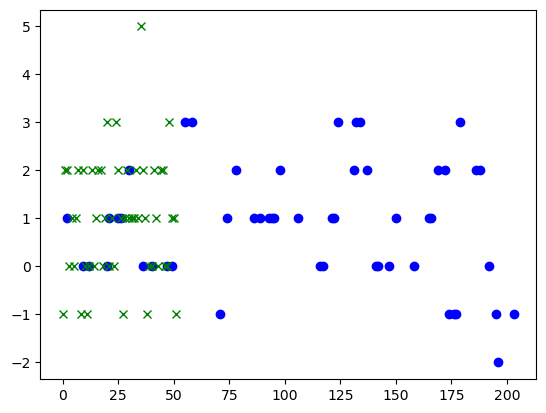

In [15]:
plt.plot(y_test,'o',linestyle='none',color = 'blue')
plt.plot(y_pred_BC_lr,'x',linestyle='none',markersize = 6,color = 'green')


In [21]:
sklearn.set_config(display="text")
Ridge_breast_cancer = Ridge()
Ridge_breast_cancer.fit(X_train, y_train)

Ridge()

In [22]:
sklearn.set_config(display="diagram")
Ridge_breast_cancer = Ridge()
Ridge_breast_cancer.fit(X_train, y_train)

Ridge()

In [23]:
sklearn.get_config()

{'assume_finite': False,
 'working_memory': 1024,
 'print_changed_only': True,
 'display': 'diagram',
 'pairwise_dist_chunk_size': 256,
 'enable_cython_pairwise_dist': True,
 'array_api_dispatch': False,
 'transform_output': 'default',
 'enable_metadata_routing': False,
 'skip_parameter_validation': False}

In [26]:
sklearn.show_versions()


System:
    python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
executable: C:\ProgramData\anaconda3\New folder\python.exe
   machine: Windows-10-10.0.22631-SP0

Python dependencies:
      sklearn: 1.4.2
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.24.3
        scipy: 1.11.1
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.7.2
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\ProgramData\anaconda3\New folder\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 10
threading_layer: intel

       filepath: C:\Users\excel\AppData\Roaming\Python\Python311\site-packages\sklearn\.libs\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 12

       filepath: C:\ProgramData\anaconda3\New folder\Library\bin

In [29]:
sklearn.base.BaseEstimator()

BaseEstimator()